# Family Income and Expenditures

## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## Dataset Representation

The dataset is derived from the Family Income and Expenditure Survey (FIES) conducted in 2015 by the Philippine Statistics Authority (PSA) nationwide. The survey, undertaken every three (3) years, aims to provide data on family income, income inequality among Filipino families, and family consumption and expenditures for the country and its seventeen (17) administrative regions. It is conducted in two separate operations using two separate questionnaires with the same set of questions. These data are the basic inputs in the estimation of the country’s poverty threshold and incidence and the basis for policies and programs of the government to improve the socio-economic conditions of the Filipino people.

The dataset was posted by Francis Paul Flores on October 5, 2017 in Kaggle.

Source of dataset: https://www.kaggle.com/grosvenpaul/family-income-and-expenditure

Reference: https://psa.gov.ph/sites/default/files/FIES%202015%20Final%20Report.pdf

In [27]:
family_df = pd.read_csv("Family Income and Expenditure.csv")
family_df.info()
family_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

(41544, 60)

### Observations

The dataset contains a total of 41,544 observations, each representing a specific household in the Philippines.


### Variables
The dataset consists of 60 variables describing each observation. The following are the descriptions for each variable:

- **`Total Household Income`**:  Total annual income earned by every member of the single household.
- **`Region`**: Region wherein the household resides.
- **`Total Food Expenditure`**: Total amount of money spent on food.
- **`Main Source of Income`**: The household's source of income wherein majority of their money is earned.
- **`Agricultural Household indicator`**: Indicates whether a household belongs to the agricultural sector; 1 = true, 0 = false.
- **`Bread and Cereals Expenditure`**: The household's total bread and cereals expenditure.
- **`Total Rice Expenditure`**: The household's total rice expenditure.
- **`Meat Expenditure`**: The household's total meat expenditure.
- **`Total Fish and  marine products Expenditure`**: The household's total fish and marine products expenditure.
- **`Fruit Expenditure`**: The household's total fruit expenditure.
- **`Vegetables Expenditure`**: The household's total vegetable expenditure.
- **`Restaurant and hotels Expenditure`**: The household's total restaurant and hotels expenditure.
- **`Alcoholic Beverages Expenditure`**: The household's total alcoholic beverages expenditure.
- **`Tobacco Expenditure`**: The household's total tobacco expenditure.
- **`Clothing, Footwear and Other Wear Expenditure`**: The household's total clothing, footwear, and other wear expenditure.
- **`Housing and water Expenditure`**: The household's total house rent and water expenditure.
- **`Imputed House Rental Value`**: The rental value that the household would get from renting the home they occupy at market rates.
- **`Medical Care Expenditure`**: The household's total medical care expenditure.
- **`Transportation Expenditure`**: The household's total transportation expenditure.
- **`Communication Expenditure `**: The household's total communication expenditure.
- **`Education Expenditure`**: The household's total education expenditure.
- **`Miscellaneous Goods and Services Expenditure`**: The household's total miscellaneous goods and services expenditure.
- **`Special Occasions Expenditure`**: The household's total special occasions expenditure.
- **`Crop Farming and Gardening expenses  `**: The household's total crop farming and gardening expenditure.
- **`Total Income from Entrepreneurial Acitivites`**: The household's total income from entrepreneurial activities.
- **`Household Head Sex`**: The sex of the household head.
- **`Household Head Age`**: The age of the household head.
- **`Household Head Marital Status`**: The marital status of the household head.
- **`Household Head Highest Grade Completed`**: The highest grade completed of the household head.
- **`Household Head Job or Business Indicator`**: Indicates the source of income of the household head.
- **`Household Head Occupation`**: The occupation of the household head.
- **`Household Head Class of Worker `**: The class of work of the household head.
- **`Type of Household`**: The family structure of the household.
- **`Total Number of Family members`**: Total number of family members living within the household.
- **`Members with age less than 5 year old`**: Number of family members that are below 5 years old.
- **`Members with age 5 - 17 years old`**: Number of family members that are within the age on five to seventeen years old.
- **`Total number of family members employed`**: Number of family members that are currently employed and contributing to the household income.
- **`Type of Building/House`**: The type of building/house of the household.
- **`Type of Roof`**: The type of roof of the house of the household.
- **`Type of Walls`**: The type of walls of the house of the household.
- **`House Floor Area`**: The total floor area of the household's house.
- **`House Age`**: The age of the household's house.
- **`Number of bedrooms`**: The number of bedrooms in the household's house.
- **`Tenure Status`**: The household's status of ownership on their house.
- **`Toilet Facilities`**: The toilet facilities in the household's house
- **`Electricity`**: Denotes whether a household has stable access to electricity.
- **`Main Source of Water Supply`**: The main source of water supply of the household.
- **`Number of Television`**: The number of television in the household's house.
- **`Number of CD/VCD/DVD`**: The number of CD/VCD/DVD in the household's house.
- **`Number of Component/Stereo set`**: The number of Component/Stereo set in the household's house.
- **`Number of Refrigerator/Freezer`**: The number of refrigerator/freezer in the household's house.
- **`Number of Washing Machine`**: The number of washing machine in the household's house.
- **`Number of Airconditioner`**: The number of airconditioner in the household's house.
- **`Number of Car, Jeep, Van`**: The number of car, jeep, and/or van of the household.
- **`Number of Landline/wireless telephones`**: The number of landline/wireless telephones of the members of the household.
- **`Number of Cellular phone`**: The number of cellular phone of the members of the household.
- **`Number of Personal Computer`**: The number of personal computer/s of the members of the household.
- **`Number of Stove with Oven/Gas Range`**: The number pf stove with oven/gas range of the household.
- **`Number of Motorized Banca`**: The number of motorized banca of the household.
- **`Number of Motorcycle/Tricycle`**: The number of motorcycle/tricycle of the household.

## Exploratory Data Analysis

To have a better understanding of the dataset, exploratory data analysis will be performed. As such, the following questions will be answered:
1. What is the distribution of the income classes across the seventeen regions in the Philippines?
2. What percentage of households per region has access to electricity?
3. What is the average number of dependents based on their income class?


### Data Cleaning

Before performing exploratory data analysis, we will first clean the data relevant to our analysis. Given the implications, we will use only the following variables:
- **`Total Household Income`**: Total amount of money earned by every member of the single household.
- **`Region`**: Region wherein the household resides.
- **`Main Source of Income`**: The household's source of income wherein majority of their money is earned.
- **`Total Number of Family Members`**: Total number of family members living within the household.
- **`Members with age less than 5 years old`**: Number of family members that are below 5 years old.
- **`Members with age 5-17 years old`**: Number of family members that are within the age on five to seventeen years old.
- **`Total number of family members employed`**: Number of family members that are currently employed and contributing to the household income.
- **`Electricity`**: Denotes whether a household has stable access to electricity.

First, we will check if the variables to be used contains multiple representations of the same categorical value.

#### `Region` variable

According to the report, the survey aims to provide data of its seventeen (17) administrative regions. As such, we can expect that the values for the **`Region`** column are the following:
- I – Ilocos Region
- II – Cagayan Valley
- III – Central Luzon
- IVA – CALABARZON
- IVB – MIMAROPA
- V – Bicol Region
- VI – Western Visayas
- VII – Central Visayas
- VIII – Eastern Visayas
- IX – Zamboanga Peninsula
- X – Northern Mindanao
- XI – Davao Region
- XII – SOCCSKSARGEN
- XIII – Caraga
- NCR
- CAR
- ARMM

In [28]:
family_df['Region'].unique()

array(['CAR', 'Caraga', 'VI - Western Visayas', 'V - Bicol Region',
       ' ARMM', 'III - Central Luzon', 'II - Cagayan Valley',
       'IVA - CALABARZON', 'VII - Central Visayas',
       'X - Northern Mindanao', 'XI - Davao Region',
       'VIII - Eastern Visayas', 'I - Ilocos Region', 'NCR',
       'IVB - MIMAROPA', 'XII - SOCCSKSARGEN',
       'IX - Zasmboanga Peninsula'], dtype=object)

We can see here that there are inconsistencies with the naming of some of the variables, and there is a spelling/encoding error for one of the regions, specifically **IX - Zasmboanga Peninsula**, which is supposed to be **IX - Zamboanga Peninsula**.

In [29]:
family_df['Region'] = family_df['Region'].replace({'Caraga' : 'XIII - Caraga'})
family_df['Region'] = family_df['Region'].replace({'IX - Zasmboanga Peninsula' : 'IX - Zamboanga Peninsula'})
family_df['Region'] = family_df['Region'].replace({' ARMM' : 'ARMM'})
family_df['Region'].unique()

array(['CAR', 'XIII - Caraga', 'VI - Western Visayas', 'V - Bicol Region',
       'ARMM', 'III - Central Luzon', 'II - Cagayan Valley',
       'IVA - CALABARZON', 'VII - Central Visayas',
       'X - Northern Mindanao', 'XI - Davao Region',
       'VIII - Eastern Visayas', 'I - Ilocos Region', 'NCR',
       'IVB - MIMAROPA', 'XII - SOCCSKSARGEN', 'IX - Zamboanga Peninsula'],
      dtype=object)

#### `Main Source of Income` variable

In [30]:
family_df['Main Source of Income'].unique()

array(['Wage/Salaries', 'Other sources of Income',
       'Enterpreneurial Activities'], dtype=object)

We can see that there is a spelling/encoding error for the **Enterpreneurial Activities**. Instead, it should be **Entrepreneurial Activities**. Other than that, no other inconsistent values and spelling/encoding errors.

In [31]:
family_df['Main Source of Income'] = family_df['Main Source of Income'].replace({'Enterpreneurial Activities' : 'Entrepreneurial Activities'})

#### `Electricity` variable

In [32]:
family_df['Electricity'].unique()

array([1, 0], dtype=int64)

This variable denotes whether a household has stable access to electricity. Thus, the values are valid as 1 indicates that the household does have access to electricity, while 0 indicates that they do not.

#### Checking Data Types
Next, we will check the data types of each of the variables.

In [33]:
subset_family_df = family_df[['Total Household Income', 'Region', 'Main Source of Income', 'Total Number of Family members', 'Members with age less than 5 year old', 'Members with age 5 - 17 years old', 'Total number of family members employed', 'Electricity']]

subset_family_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Total Household Income                   41544 non-null  int64 
 1   Region                                   41544 non-null  object
 2   Main Source of Income                    41544 non-null  object
 3   Total Number of Family members           41544 non-null  int64 
 4   Members with age less than 5 year old    41544 non-null  int64 
 5   Members with age 5 - 17 years old        41544 non-null  int64 
 6   Total number of family members employed  41544 non-null  int64 
 7   Electricity                              41544 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 2.5+ MB


We can see that there are no incorrect data types for the variables. The Total Household Income are rough estimates of the households' income which is why it uses `int64` instead of `float`.

#### Checking for NaN/null values
Next, we will check any of the variables contains any `NaN/null` values.

In [34]:
family_df.isnull().any()
null_vars = family_df.columns[family_df.isnull().any()].tolist()
family_df[null_vars].isnull().sum()

Household Head Occupation         7536
Household Head Class of Worker    7536
dtype: int64

We can see that none of the variables contain any **`Nan/null`** values.

#### Checking for duplicate values
Lastly, we will check for duplicate observations and drop them from the dataset since each observation should represent only one household.

In [35]:
family_df.drop_duplicates()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Entrepreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Entrepreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Entrepreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Entrepreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


We can see that there are no drops observations after calling the `drop_duplicates` functions. This means that there are no duplicates in the dataset.

### Pre-processing Data

Many of the questions are concerned with the different income clusters of the households. Hence, we create a new variable, **`Income Class`**, which identifies which income class the following household belongs to. As reference, we used the indicative range at 2015 prices established by the Philippine Institute of Developmental Studies (PIDS) since the survey was conducted at the year 2015. The income classes are as follows:
- Poor: less than Php 9,100
- Low-income class: Php 9,100 - Php 18,200
- Lower middle-income class: Php 18,200 - Php 36,400
- Middle middle-income class: Php 36,400 - Php 63,700
- Upper middle-income class: Php 63,700 - Php 109,200
- Upper income class: Php Php 109,000 - Php 182,000
- Rich: Php 182,000 and above

Source: https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidspn1818.pdf 

In [36]:
def label_income (row):
    income = row['Total Household Income'] / 12

    if income < 9100 :
        return 'Poor'
    if income >= 9100 and income < 18200 :
        return 'Low-income class'
    if income >= 18200 and income < 36400 :
        return 'Lower middle-income class'
    if income >= 36400 and income < 63700 :
        return 'Middle middle-income class'
    if income >= 63700 and income < 109200 :
        return 'Upper middle-income class'
    if income >= 109000 and income < 182000 :
        return 'Upper-income class'
    if income > 182000 : 
        return 'Rich'

family_df['Income Class'] = family_df.apply(lambda row: label_income(row), axis=1)

Next, we create subsets of the dataset according to each **`Region`** value since some questions are also concerned with data regarding each region.

In [37]:
I_df = family_df[(family_df.Region == "I - Ilocos Region")]
II_df = family_df[(family_df.Region == "II - Cagayan Valley")]
III_df = family_df[(family_df.Region == "III - Central Luzon")]
IVA_df = family_df[(family_df.Region == "IVA - CALABARZON")]
IVB_df = family_df[(family_df.Region == "IVB - MIMAROPA")]
V_df = family_df[(family_df.Region == "V - Bicol Region")]
VI_df = family_df[(family_df.Region == "VI - Western Visayas")]
VII_df = family_df[(family_df.Region == "VII - Central Visayas")]
VIII_df = family_df[(family_df.Region == "VIII - Eastern Visayas")]
IX_df = family_df[(family_df.Region == "IX - Zamboanga Peninsula")]
X_df = family_df[(family_df.Region == "X - Northern Mindanao")]
XI_df = family_df[(family_df.Region == "XI - Davao Region")]
XII_df = family_df[(family_df.Region == "XII - SOCCSKSARGEN")]
XIII_df = family_df[(family_df.Region == "XIII - Caraga")]
NCR_df = family_df[(family_df.Region == "NCR")]
CAR_df = family_df[(family_df.Region == "CAR")]
ARMM_df = family_df[(family_df.Region == "ARMM")]

### EDA Question 1

What is the average total household income in each of the regions?

For this question, we are only concerned with two variables, **`Total Household Income`** and **`Region`**.

First, we will aggregate some summary statistics regarding the **`Total Household Income`** according to their respective **`Region`** to get a better idea of its distribution.

In [38]:
income_agg = family_df.groupby("Region").agg({"Total Household Income": ["mean", "std"]})
income_agg.sort_values(("Total Household Income", "mean"), ascending=False)

Total Household Income               
                                           mean            std
Region                                                        
NCR                               420861.861501  384485.672730
IVA - CALABARZON                  303360.536040  281920.226795
III - Central Luzon               292965.181650  287715.808064
CAR                               269540.484638  274564.165761
XI - Davao Region                 238115.891251  270968.796285
I - Ilocos Region                 238110.084327  223693.113888
II - Cagayan Valley               236778.221721  250914.087520
VII - Central Visayas             234909.314050  294259.866722
VI - Western Visayas              220481.260260  377507.309546
IVB - MIMAROPA                    216685.124900  263207.197408
X - Northern Mindanao             214057.779544  232931.775563
XIII - Caraga                     196907.376543  212894.383492
VIII - Eastern Visayas            196736.581087  309641.807015
IX - Zamboanga Peninsula          191000.908277  238229.274718
V - Bicol Region                  186105.492718  177031.725827
XII - SOCCSKSARGEN                182984.802545  228231.071653
ARMM                              134746.817616   95345.916686

Next, we will visualize the average total household incomes into a bar graph to get a better view of their comparison.

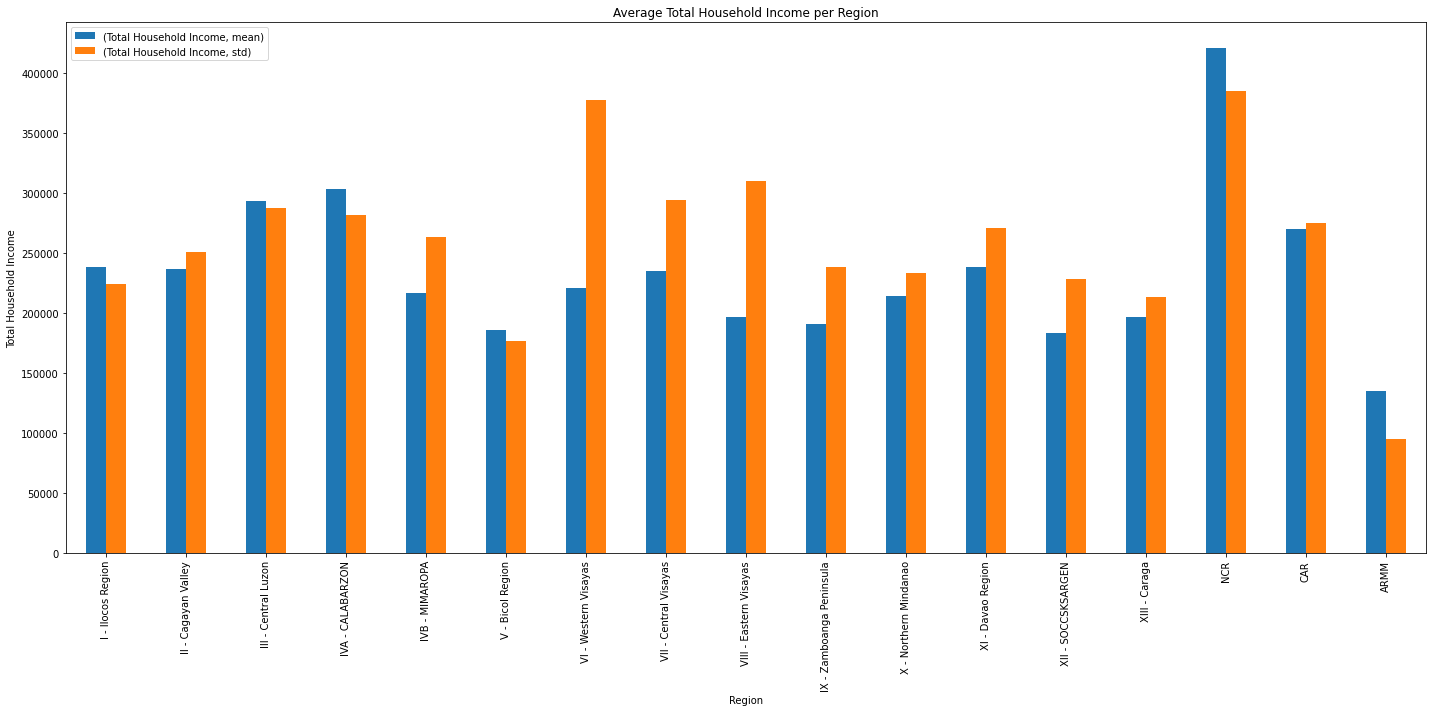

In [39]:
regions_income_mean_agg = family_df.groupby("Region").agg({"Total Household Income": ["mean", "std"]})
regions_income_mean_agg
regions = [
       'I - Ilocos Region', 
       'II - Cagayan Valley', 
       'III - Central Luzon',
       'IVA - CALABARZON', 
       'IVB - MIMAROPA', 
       'V - Bicol Region',
       'VI - Western Visayas',
       'VII - Central Visayas',
       'VIII - Eastern Visayas', 
       'IX - Zamboanga Peninsula',
       'X - Northern Mindanao', 
       'XI - Davao Region', 
       'XII - SOCCSKSARGEN',
       'XIII - Caraga',
       'NCR',
       'CAR',
       'ARMM'
]

regions_income_mean_agg.reindex(regions).plot.bar(figsize=(20,10))
plt.xlabel('Region')
plt.ylabel('Total Household Income')
plt.title('Average Total Household Income per Region')
plt.tight_layout()
plt.xticks(rotation=90)
plt.legend()
plt.show()

With the values presented in the graph, we can easily see that **NCR** has the highest average total household income, followed by **III - Central Luzon** and **VIA - CALABARZON**, respectively. According to the PIDS, urban households are predominantly middle income. On the other hand, among rural households, only a third are middle income, while three-fifths are low income. The middle class dominantly reside in these three aforementioned regions as these areas have wide access to manufacturing and commercial establishments. The 
predominance of the middle-income class in these three regions may be reason for their high average total household incomes compared to the other regions.

However, it is important to note that the data is highly dispersed as seen in their corresponding standard deviations. Their standard deviations are nearly equiavalent to their respective means, if not, even much higher than their mean. Thus, the **`Total Household Income`** among different households has great variability.

### EDA Question 2
What percentage of households per region has access to electricity?

In particular, we're interested in the values found within the **`Region`** and **`Electricity`** variables.

Since the observations are already sorted into individual dataframes of their respective regions in the pre-processing, the next step would be obtaining the specific values we want to examine, that being the percentage of households within a given region that pay for electricity. 

In [40]:
I_PCT = [(I_df['Electricity'].value_counts()/I_df['Electricity'].count())*100]
II_PCT = [(II_df['Electricity'].value_counts()/II_df['Electricity'].count())*100]
III_PCT = [(III_df['Electricity'].value_counts()/III_df['Electricity'].count())*100]
IVA_PCT = [(IVA_df['Electricity'].value_counts()/IVA_df['Electricity'].count())*100]
IVB_PCT = [(IVB_df['Electricity'].value_counts()/IVB_df['Electricity'].count())*100]
V_PCT = [(V_df['Electricity'].value_counts()/V_df['Electricity'].count())*100]
VI_PCT = [(VI_df['Electricity'].value_counts()/VI_df['Electricity'].count())*100]
VII_PCT = [(VII_df['Electricity'].value_counts()/VII_df['Electricity'].count())*100]
VIII_PCT = [(VIII_df['Electricity'].value_counts()/VIII_df['Electricity'].count())*100]
IX_PCT = [(IX_df['Electricity'].value_counts()/IX_df['Electricity'].count())*100]
X_PCT = [(X_df['Electricity'].value_counts()/X_df['Electricity'].count())*100]
XI_PCT = [(XI_df['Electricity'].value_counts()/XI_df['Electricity'].count())*100]
XII_PCT = [(XII_df['Electricity'].value_counts()/XII_df['Electricity'].count())*100]
XIII_PCT = [(XIII_df['Electricity'].value_counts()/XIII_df['Electricity'].count())*100]
NCR_PCT = [(NCR_df['Electricity'].value_counts()/NCR_df['Electricity'].count())*100]
CAR_PCT = [(CAR_df['Electricity'].value_counts()/CAR_df['Electricity'].count())*100]
ARMM_PCT = [(ARMM_df['Electricity'].value_counts()/ARMM_df['Electricity'].count())*100]

I_PCT = [95.698467,4.301533]
II_PCT = [94.727355,5.272645]
III_PCT = [97.343219,2.656781]
IVA_PCT = [96.756367,3.243633]
IVB_PCT = [85.588471,14.411529]
V_PCT = [88.106796,11.893204]
VI_PCT = [88.214662,11.785338]
VII_PCT = [88.036206,11.963794]
VIII_PCT = [86.14, 13.86]
IX_PCT = [80.816555,19.183445]
X_PCT = [86.38,13.62]
XI_PCT = [87.12,12.88]
XII_PCT = [82.893497,17.106503]
XIII_PCT = [90.97,9.03]
NCR_PCT = [98.886199,1.113801]
CAR_PCT = [92.521739,7.478261]
ARMM_PCT = [53.514235,46.485765]

With the values determined and stored, we can now easily create a bar plot that will represent these and allow us to visualize the differences.

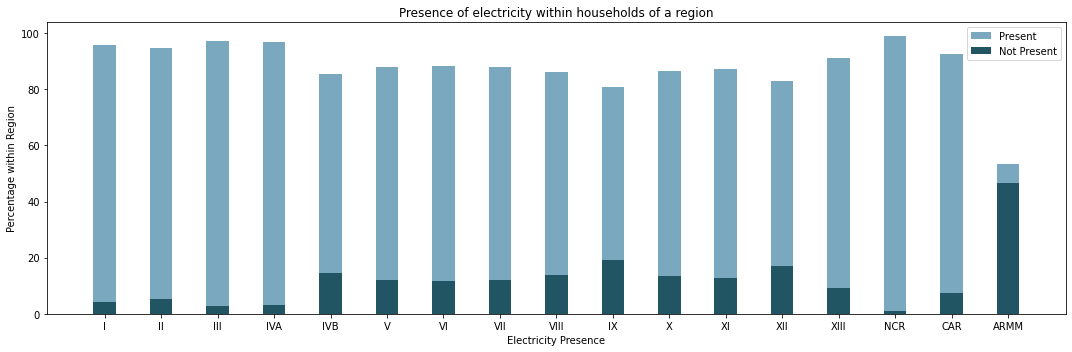

In [41]:
fig = plt.figure(figsize=(15,5))
bar_width = 0.35

dat_pos_perc = {
    'I':95.698467,'II':94.727355, 'III':97.343219, 
    'IVA':96.756367, 'IVB':85.588471, 'V':88.106796, 
    'VI':88.214662,'VII':88.036206, 'VIII':86.14,
    'IX':80.816555,'X':86.38,'XI':87.12,
    'XII':82.893497,'XIII':90.97, 
    'NCR':98.886199,'CAR':92.521739,  'ARMM':53.514235
}

dat_neg_perc = {
    'I':4.301533,'II':5.272645, 'III':2.656781, 
    'IVA':3.243633, 'IVB':14.411529, 'V':11.893204, 
    'VI':11.785338,'VII':11.963794, 'VIII':13.86,
    'IX':19.183445,'X':13.62,'XI':12.88,
    'XII':17.106503,'XIII':9.03, 
    'NCR':1.113801,'CAR':7.478261,  'ARMM':46.485765
}

present = list(dat_pos_perc.values())
notPresent = list(dat_neg_perc.values())
regions = list(dat_pos_perc.keys())


p1 = plt.bar(regions, present, color = '#7AA9BF', width=0.4, label='Present')
p2 = plt.bar(regions, notPresent, color ="#225564", width=0.4, label = 'Not Present')

plt.xlabel('Electricity Presence')
plt.ylabel('Percentage within Region')
plt.title('Presence of electricity within households of a region')
plt.tight_layout()
plt.legend()
plt.show()

With the values represented, we can see that most regions have a high percentage of housholds that utilize and pay for electricity. While there is a "outlier" in the data from ARMM, one could understand the reason by this through a cursory look into the current situation of the region ARMM in relation with the rest of the Philippines and its power structure. 

### EDA Question 3

What is the average number of dependents based on their income class? 

To answer this, first, we'll have to get the total number of dependents per household. Dependents are those household members who are below the age of 18 which is why we'll be adding two variables from the dataset namely, **Members with age less than 5 year old** and **Members with age 5 - 17 years old**. The sum of these two variables will be put into a new variable named **`Total Number of Dependents`**.

In [42]:
dependent_column = family_df["Members with age less than 5 year old"] + family_df["Members with age 5 - 17 years old"]
family_df["Total Number of Dependents"] = dependent_column

Second, we'll be getting the mean of the total number of dependents per income class, and showing its result by using both numerical summary and visualization. To accomplish this, first, we'll be getting the mean of the total number of dependents per income class.

In [43]:
dependent_stat = family_df.groupby('Income Class').agg({'Total Number of Dependents': ['mean']})
print(dependent_stat)

                           Total Number of Dependents
                                                 mean
Income Class                                         
Low-income class                             2.011920
Lower middle-income class                    1.735294
Middle middle-income class                   1.569153
Poor                                         1.606587
Rich                                         1.051546
Upper middle-income class                    1.405428
Upper-income class                           1.321311


Lastly, to have a better visualization of the difference in means, we'll be using a bar graph.

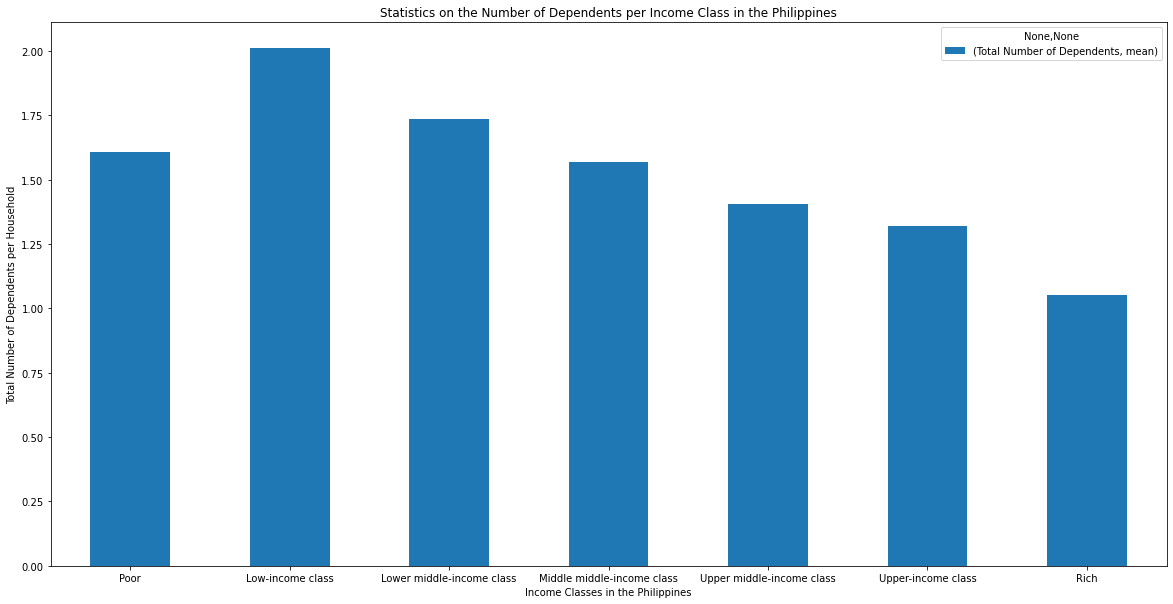

In [44]:
income_classes = [
    'Poor',
    'Low-income class',
    'Lower middle-income class',
    'Middle middle-income class',
    'Upper middle-income class',
    'Upper-income class',
    'Rich'
]

dependent_stat.reindex(income_classes).plot.bar(figsize=(20,10))
plt.xticks(rotation=0)
plt.xlabel("Income Classes in the Philippines")
plt.ylabel("Total Number of Dependents per Household")
plt.title("Statistics on the Number of Dependents per Income Class in the Philippines")
plt.show()

Based on the summary, the mean of the number of dependents per income class are the following:
- Poor: 1.61
- Low-income class: 2.01
- Lower middle-income class: 1.74
- Middle middle-income class: 1.57
- Upper middle-income class: 1.41
- Upper income class: 1.32
- Rich class: 1.05

After grouping the households into different income classes and computing for the mean of their total number of dependents, it can be seen that the mean of the total number of dependents per income class are close to each other. Although one eye-catching result was the rich class having the lowest mean of dependents, and the low-income class having the highest mean of dependents. Despite earning the highest income, households coming from the rich class are actually feeding less mouths than those coming from lower classes. Additionally, another noticeable difference is that the higher the income class, the lower the mean of their total number of dependents.

## Research Questions

This research aims to answer the following questions:
1. Is there a significant difference in the average of the total income of households whose main income is via wages/salaries compared to those via entrepreneurial activities?
2. Is there a significant difference on the access to electricity among households from different regions?

### Research Question 1

This part of the notebook aims to answer the first research question which is, **"Is there a significant difference in the average of the total income of households whose main income is via wages/salaries compared to those via entrepreneurial activities?"** This question is answerable by statistical inference on means, and the variables that will be used are the following:

- **`Total Household Income`**: Total amount of money earned by every member of the single household.
- **`Main Source of Income`**: The household's source of income wherein majority of their money is earned.

This research question will focus on two distinct values under the variable **`Main Source of Income`** which are the following:

- **Wage/Salaries**: This refers to households whose main source of income comes from working in a company or organization.
- **Entrepreneurial Activities**: This refers to households whose main source of income comes from entrepreneurial activities.

#### T-Test Comparing the Main Sources of Income

We set up our hypotheses as follows:

**$H_0$ (null hypothesis)**: There is no significant difference in the averages of the total income between households whose main income is via wage/salaries and households whose main income is via entrepreneurial activities.


**$H_A$ (alternative hypothesis)**: There is a significant difference in the averages of the total income between households whose main income is via wage/salaries and households whose main income is via entrepreneurial activities.

The difference in the averages between the total income between households whose main income is via **wage/salaries and households** whose main income is via **entrepreneurial activities** are as follows:

In [45]:
summary_stat = family_df.groupby("Main Source of Income").agg({"Total Household Income": ["mean", "median", "std", len]})
summary_stat

wage_mean = summary_stat.loc["Wage/Salaries"].loc["Total Household Income"].loc["mean"]
entrep_mean = summary_stat.loc["Entrepreneurial Activities"].loc["Total Household Income"].loc["mean"]

diff = wage_mean - entrep_mean
print('{:.2f}'.format(diff))

53930.57


The difference between the means is **Php 53,930.57**

Now, we will test if this difference is statistically significant by using the **t-test** to compare the average total household income of the two main sources of income in question.

The **significance level (α)** that will be used for the test is **5% or 0.05**.

In [46]:
ttest_ind(family_df[family_df["Main Source of Income"] == "Wage/Salaries"]["Total Household Income"],
          family_df[family_df["Main Source of Income"] == "Entrepreneurial Activities"]["Total Household Income"],
          equal_var = False)

Ttest_indResult(statistic=15.064282810075762, pvalue=5.893458809099433e-51)

#### Insights and Conclusion

Given the data from the table, the t-test function above was able to compute the following values (rounded off to 2nd decimal place):

* **Test Statistic**: 15.06

* **P-Value**: 0.00

With the p-value of **0.00** being less than the significance level of **0.05**, the conclusion our group had reached was to **reject the null hypothesis**, suggesting that there is a statistical difference between the average total income between households whose main income is via wage/salaries and households whose main income is via entrepreneurial activities. 

This information provides a better understanding for households examining options for sources of income they may work towards. In consideration of the range of responses that could be found within the **Other sources of Income** category, the group had chosen to compare only wage/salaries and entrepreneurial activities as they were the more conventional sources of income. Understanding the difference is vital to understanding the risks in choosing sources of income for a household. However, we still need to consider that there are many factors in choosing a source of income. There may be outliers such as people with different circumstances like those earning very low or very high incomes.

### Research Question 2

The second research question which is, **"Is there a significant difference on the access to electricity among households from different regions?"**, will be disccussed. This question is answerable by statistical inference on categorical data, and the variables that will be used are the following:

- **`Region`**: Denotes which region in the Philippines the household is located in.
- **`Electricity`**: Denotes whether a household has stable access to electricity; 1 = true, 0 = false.

#### Chi-Square Test

We set up our hypotheses as follows:

**$H_0$ (null hypothesis)**: There is no significant difference on the access to electricity among households from different regions.

**$H_A$ (alternative hypothesis)**: There is a significant difference on the access to electricity among households from different regions.



To see if there is a significant difference on the access to electricity among households from different regions, we'll be performing a **Chi-Square Test** on the variables, **`Total Household Income`** and **`Electricity`**. 

The **significance level (α)** that will be used for the test is **5% or 0.05**.

First, we will be getting the number of households who has access to electricity based on their region.

In [47]:
counts = family_df.groupby("Electricity")["Region"].value_counts()
counts

Electricity  Region                  
0            ARMM                        1045
             XII - SOCCSKSARGEN           363
             IX - Zamboanga Peninsula     343
             VI - Western Visayas         336
             VIII - Eastern Visayas       324
             XI - Davao Region            315
             VII - Central Visayas        304
             V - Bicol Region             294
             X - Northern Mindanao        257
             IVB - MIMAROPA               180
             XIII - Caraga                161
             IVA - CALABARZON             135
             CAR                          129
             II - Cagayan Valley          117
             I - Ilocos Region            101
             III - Central Luzon           86
             NCR                           46
1            NCR                         4084
             IVA - CALABARZON            4027
             III - Central Luzon         3151
             VI - Western Visayas        2

Then, we will be performing statistical inference by using a Chi-Square Test. 

In [48]:
table = pd.DataFrame([counts[0], counts[1]], index=["no electricity", "electricity"]).transpose()
table

,no electricity,electricity
Region,,
ARMM,1045,1203
XII - SOCCSKSARGEN,363,1759
IX - Zamboanga Peninsula,343,1445
VI - Western Visayas,336,2515
VIII - Eastern Visayas,324,2013
XI - Davao Region,315,2131
VII - Central Visayas,304,2237
V - Bicol Region,294,2178
X - Northern Mindanao,257,1630


In [49]:
chi2_contingency(table)

(4294.009149442903,
 0.0,
 16,
 array([[ 245.44887348, 2002.55112652],
        [ 231.6915078 , 1890.3084922 ],
        [ 195.22357019, 1592.77642981],
        [ 311.28769497, 2539.71230503],
        [ 255.16637782, 2081.83362218],
        [ 267.06759099, 2178.93240901],
        [ 277.44020797, 2263.55979203],
        [ 269.90641248, 2202.09358752],
        [ 206.03292894, 1680.96707106],
        [ 136.37261698, 1112.62738302],
        [ 194.56845754, 1587.43154246],
        [ 454.42980936, 3707.57019064],
        [ 188.34488735, 1536.65511265],
        [ 242.28249567, 1976.71750433],
        [ 256.36741768, 2091.63258232],
        [ 353.43327556, 2883.56672444],
        [ 450.93587522, 3679.06412478]]))

#### Insights and Conclusion

Given the data from the table, the chi² test function above was able to compute the following values (rounded off to 2nd decimal place):

- **Test Statistic**: 4294.01
- **P-Value**: 0.00
- **Degree of Freedom**: 16

With the p-value of **0.00** being *less than* the significance level of **0.05**, the conclusion our group had reached was to **reject the *null hypothesis***, suggesting that there is a statistical difference between the access to electricity between households in different regions.

Understanding that there are differences between each region's ability to provide households with electricity is key to understanding how to address the lack thereof. While there may be households here that do not require electricity, those are more likely outliers to the general sample as the data from the EDA 2 shows that a majority of households in the sample use it. In that sense, the fact that there is a significant difference between the availability of electricity of households should definitely be taken note of by regional governance in order to rectify issues with their respective power grids.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07392705-e4cf-448b-9ab1-f4066f1bab9d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>